In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fcmeans import FCM
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target,columns=['Species'])

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [7]:
fcm=FCM(n_cluster=3)
fcm.fit(x.values)
fcm_centers=fcm.centers
fcm_labels=fcm.predict(x.values)
fcm_centers=pd.DataFrame(fcm_centers)

In [8]:
fcm_centers

,0,1,2,3
0,6.525152,3.037418,5.447160,2.084175
1,7.437369,3.079715,6.277320,2.052802
2,6.190780,2.877974,4.709952,1.557172
3,4.998878,3.418086,1.467942,0.246161
4,5.585000,2.616656,3.949175,1.212126


In [9]:
fcm_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 0, 2, 1, 0, 0, 1, 4, 1, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int64)

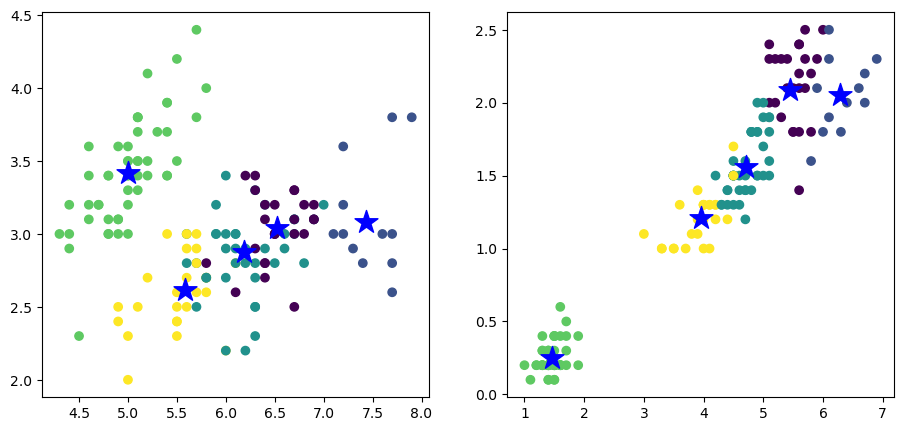

In [10]:
f,axes=plt.subplots(1,2,figsize=(11,5))
axes[0].scatter(list(x.iloc[:,0]),list(x.iloc[:,1]),c=fcm_labels)
axes[1].scatter(list(x.iloc[:,2]),list(x.iloc[:,3]),c=fcm_labels)
axes[0].scatter(fcm_centers[0],fcm_centers[1],s=300,marker='*',c='b')
axes[1].scatter(fcm_centers[2],fcm_centers[3],s=300,marker='*',c='b')

In [11]:
import numpy as np
import pandas as pd
import random
import operator
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

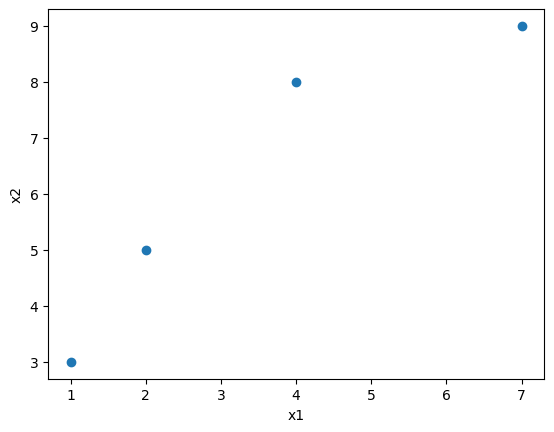

In [12]:
x1=[1,2,4,7]
x2=[3,5,8,9]
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2)
plt.show()

In [13]:
df=pd.DataFrame(list(zip(x1,x2)),columns=['x1','x2'])
df

,x1,x2
0,1,3
1,2,5
2,4,8
3,7,9


In [21]:
np.random.seed(42)
n=len(df)
k=2
d=2
m=2
max_iters=12

In [22]:
def initializemembershipweights():
    weight=np.random.dirichlet(np.ones(k),size=n)
    weight_arr=np.array(weight)
    return weight_arr

In [23]:
def computecentroids(weight_arr):
    c=[]
    for i in range(k):
        weight_sum=np.power(weight_arr[:,i],m).sum()
        cj=[]
        for x in range(d):
            num=(df.iloc[:,x].values*np.power(weight_arr[:,1],m)).sum()
            c_val=num/weight_sum
            cj.append(c_val)
        c.append(cj)
    return c

In [24]:
def updateweight(weight_arr,c):
    denon=np.zeros(n)
    for i in range(k):
        dist=(df.iloc[:,:].values-c[i])**2
        dist=np.square(dist)
        denon=denon+np.power(1/dist,2/(m-1))
    for j in range(k):
        dist=(df.iloc[:,:].values-c[i])**2
        dist=np.sum(dist,axis=1)
        dist=np.square(dist)
        weight_arr[:,1]=np.divide(np.power(1/dist,2/(m-1)),denon)
    return weight_arr

In [25]:
def plotData(z,c):
    plt.subplot(4,3,z+1)
    plt.scatter(list(df.iloc[:,0]),list(df.iloc[:,1]),s=200,marker='o')
    for center in c:
        plt.scatter(center[0],center[1],s=300,marker='o',color='r')
        plt.axis('equal')
        plt.xlabel('x',fontsize=20)
        plt.ylabel('y',fontsize=20)

In [26]:
def fuzzymeanalgorithm():
    weight_arr=initializemembershipweights()
    plt.figure(figsize=(50,50))
    for z in range(max_iters):
        c=computecentroids(weight_arr)
        updateweight(weight_arr,c)
        plotData(z,c)
    plt.show()
    return (weight_arr,c)

In [27]:
fuzzymeanalgorithm()

ValueError: operands could not be broadcast together with shapes (4,) (4,2) 

<Figure size 5000x5000 with 0 Axes>